In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import time

df = pd.read_csv('labeled_and_scored_comments.csv')

df.sort_values(['score'])

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
1158,61a85266de70cca0,Можешь говорить по русски.,0.000004,0,0,0,0,0,0
5246,030a9ba0b32b4456,Rodzina Krusenstern Potomkowie Admirała Adama ...,0.000009,0,0,0,0,0,0
11040,a6814193ac6b4705,The opening paragraph states that the game is ...,0.000091,0,0,0,0,0,0
24192,f0d6dee96e057a5b,The book is used as a source in a number of ar...,0.000116,0,0,0,0,0,0
2332,cbb9268d3c7429c1,Vals Vienés \n |Rumba \n |Cha Cha Chá(ciclo 7),0.000131,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
19994,1429a2c930688317,you fucking piece of shit,0.997278,1,1,1,0,1,0
28728,d82e45eb103ad07b,fuck off you stupid aspy asshole,0.997736,1,1,1,0,1,0
25535,e9b92c6c6b01aeef,FUCK YOU YOU PIECE OF SHIT \n FUCK YOU YOU PIE...,0.997982,1,1,1,0,1,0
25945,e783fd267f3a9d3b,FUCK WIKIPEDIA ON WHEELS! \n\nFuck off wikiped...,0.998136,1,1,1,0,1,0


In [3]:
from googleapiclient.discovery import build
import json

def get_toxicity_score(comment):
    
  API_KEY = 'XXXXXXX'
    
  client = build(
  "commentanalyzer",
  "v1alpha1",
  developerKey=API_KEY,
  discoveryServiceUrl="https://commentanalyzer.googleapis.com/$discovery/rest?version=v1alpha1"
  )

  analyze_request = {
  'comment': { 'text': comment },
  'requestedAttributes': {'TOXICITY': {}}
  }
    
  response = client.comments().analyze(body=analyze_request).execute()
  toxicity_score = response["attributeScores"]["TOXICITY"]["summaryScore"]["value"]
    
  return toxicity_score

In [4]:
comment_list_swear = ['c', 'd', 'f', 'cr', 'fu', 'sh', 'slu', 'bit', 'dam', 'who']
comment_list_control = ['h', 'l', 'e', 'tr', 'gr', 'ot', 'th', 'gra', 'pla', 'tho']
score_list_swear = []
score_list_control = []

threshold = 0.07
count_swear = 0
count_control = 0

for comment in comment_list_swear:
    score = get_toxicity_score(comment)
    if score > threshold:
        count_swear+=1
    print(comment, score)
    score_list_swear.append(score)
    time.sleep(1)
    
print()
                      
for comment in comment_list_control:
    score = get_toxicity_score(comment)
    if score > threshold:
        count_control+=1
    print(comment, score)
    score_list_control.append(score)
    time.sleep(1)

c 0.021518974
d 0.031014297
f 0.112788886
cr 0.020408317
fu 0.23523538
sh 0.051737156
slu 0.21980777
bit 0.20963
dam 0.23189566
who 0.019297661

h 0.027237365
l 0.035134587
e 0.010840933
tr 0.031185975
gr 0.03770977
ot 0.023117077
th 0.02397547
gra 0.024142517
pla 0.03204437
tho 0.027237365


In [5]:
swear_df= pd.DataFrame({'comment' : comment_list_swear, 'score' : score_list_swear})
swear_df.describe()

,score
count,10.000000
mean,0.115333
std,0.097733
min,0.019298
25%,0.023893
50%,0.082263
75%,0.217263
max,0.235235


In [6]:
control_df = pd.DataFrame({'comment' : comment_list_control, 'score' : score_list_control})
control_df.describe()

,score
count,10.000000
mean,0.027263
std,0.007578
min,0.010841
25%,0.024017
50%,0.027237
75%,0.031830
max,0.037710


In [7]:
threshold = 0.1

df['prediction'] = df['score'] > threshold
df['prediction'].value_counts()

True     25029
False    16309
Name: prediction, dtype: int64

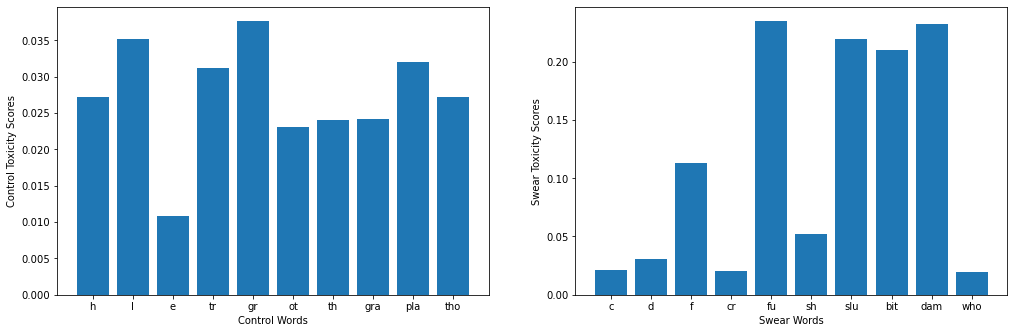

In [8]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])

ax1.bar(comment_list_control,score_list_control)
plt.xlabel("Control Words")
plt.ylabel("Control Toxicity Scores")

ax2 = fig.add_axes([1.2,0,1,1])
ax2.bar(comment_list_swear,score_list_swear)
plt.xlabel("Swear Words")
plt.ylabel("Swear Toxicity Scores")

plt.show()